<a href="https://colab.research.google.com/github/TenzinYangzom158/Machine-Learning---01/blob/main/Lab2_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Lab 1: Implement simple and multiple linear regression algorithm and EDA for your data set**

Linear Regression

In [2]:
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

In [3]:
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
# reading CSV file
data = pd.read_csv("possum.csv")
data.head(10)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
5,6,1,Vic,f,1.0,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0
6,7,1,Vic,m,2.0,95.3,58.2,89.5,36.0,71.5,52.0,14.2,30.0,34.5
7,8,1,Vic,f,6.0,94.8,57.6,91.0,37.0,72.7,53.9,14.5,29.0,34.0
8,9,1,Vic,f,9.0,93.4,56.3,91.5,37.0,72.4,52.9,15.5,28.0,33.0
9,10,1,Vic,f,6.0,91.8,58.0,89.5,37.5,70.9,53.4,14.4,27.5,32.0


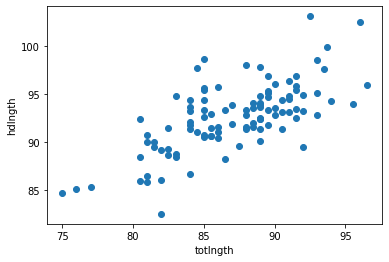

In [4]:
# plotting the scatter plot to check relationship between 'head-length' and 'total length'
plt.scatter(data['totlngth'],data['hdlngth'])
plt.xlabel('totlngth')
plt.ylabel('hdlngth')
plt.show()

In [5]:
totlngth = data['totlngth'].tolist()
hdlngth = data['hdlngth'].tolist()

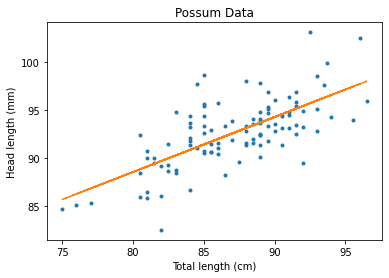

In [6]:
x = [] #Training data
y = [] #Target Values

for i in totlngth:
  x.append([i])

for i in hdlngth:
  y.append([i])

model = LinearRegression()
#fit(X,y[,sample_weight]) - Fit linear model
model.fit(x,y) 
plt.figure()
plt.title('Possum Data')
plt.xlabel('Total length (cm)')
plt.ylabel('Head length (mm)')
plt.plot(x, y,'.')
# predict(x) - predict using the linear model
plt.plot(x, model.predict(x),'--')


Predicted headlength =  [[97.13541516]]


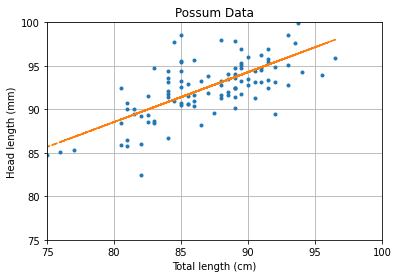

In [7]:
plt.title('Possum Data')
plt.xlabel('Total length (cm)')
plt.ylabel('Head length (mm)')
plt.plot(x,y,'.')
plt.plot(x,model.predict(x),'--')
plt.axis([75,100,75,100])
plt.grid(True) 
print ("Predicted headlength = ",model.predict([[95]])) 
plt.show()

In [8]:
print ("Predicted headlength = ",model.predict([[95]])) 
plt.show()

Predicted headlength =  [[97.13541516]]


In [10]:
data.shape  # Number of rows and column of the dataset

(104, 14)

Multiple Linear Regression and EDA

In [19]:
#import all the necessary libraries
import numpy as np
from math import sqrt
from scipy.stats import skew
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [12]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

In [14]:
# load the datasets into dataframe
train = pd.read_csv('possum.csv') #same dataset as used in simple linear regression

In [15]:
# show the first few records of train set
train.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [16]:
train.shape

(104, 14)

In [17]:
# check the missing values
print ('Total missing values in the train dataset', sum(train.isna().sum()))

Total missing values in the train dataset 3


In [18]:
train['age'].describe()

count    102.000000
mean       3.833333
std        1.909244
min        1.000000
25%        2.250000
50%        3.000000
75%        5.000000
max        9.000000
Name: age, dtype: float64

In [25]:
#Let's review the relationship between the columns to examine the correlations between the features and the target.
numeric_cols = train.select_dtypes(include = [np.number])
corr = numeric_cols.corr()
print ('Top ten Correlated Features with age:'), print (corr['age'].sort_values(ascending = False)[:5], '\n')
print ('Top ten Uncorrelated Features with age:'), print (corr['age'].sort_values(ascending = False)[-5:])

Top ten Correlated Features with age:
age        1.000000
belly      0.354298
chest      0.334209
hdlngth    0.319022
skullw     0.285107
Name: age, dtype: float64 

Top ten Uncorrelated Features with age:
footlgth    0.126190
taill       0.118241
earconch    0.053405
site       -0.131423
case       -0.194525
Name: age, dtype: float64


(None, None)

Text(0.5, 0, 'belly size')

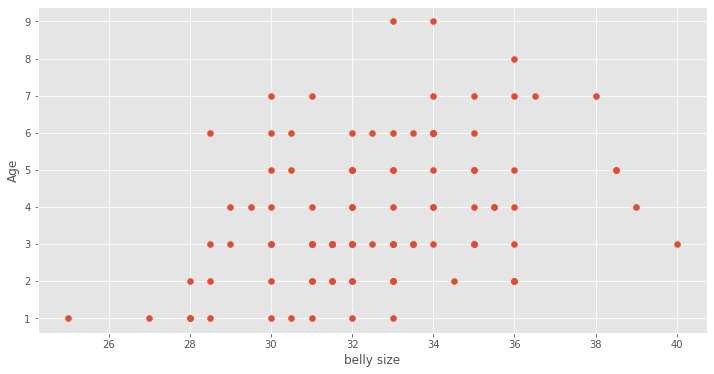

In [22]:
# There are increases in belly size correspond to increases in age, with few outliers.
plt.scatter(x = train['belly'], y = train['age'])
plt.ylabel('Age')
plt.xlabel('belly size')

Text(0.5, 0, 'chest size')

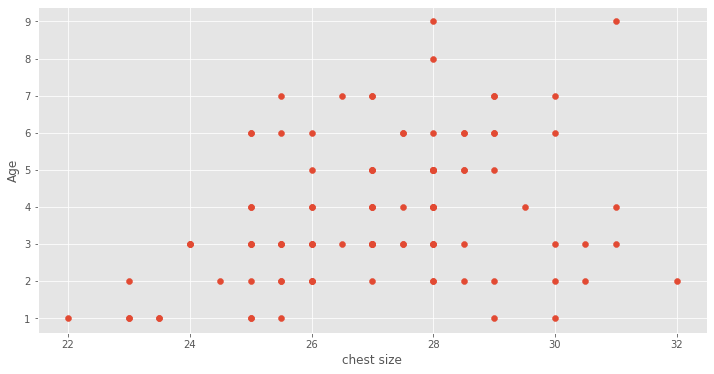

In [23]:
plt.scatter(x = train['chest'], y = train['age'])
plt.ylabel('Age')
plt.xlabel('chest size')

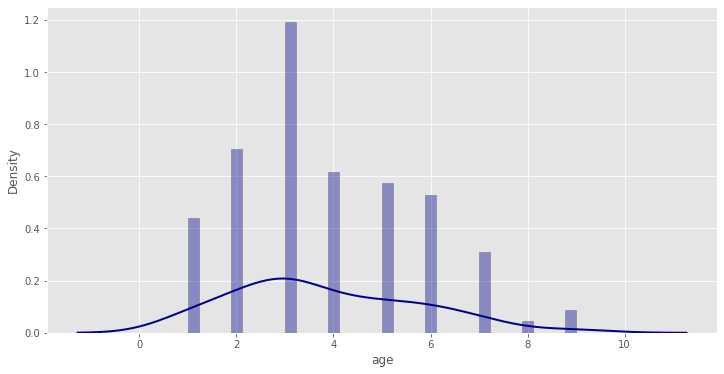

In [31]:
# Density Plot and Histogram of Age..Showcases positive skewness. Tail is to the right of Mean.
import warnings
import seaborn as sns
warnings.simplefilter(action='ignore', category=FutureWarning)
#
plt.figure(figsize=(12,6))
sns.distplot(train['age'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

In [32]:
# remove belly outliers
train = train[train['belly'] < 38]

In [33]:
# remove chest outliers
train = train[train['chest'] < 30]

In [34]:
# drop columns with percentage of missing values > 80%
train_percentage = train.isnull().sum() / train.shape[0]
print (train_percentage[train_percentage > 0.80])
train = train.drop(train_percentage[train_percentage > 0.80].index, axis = 1)

Series([], dtype: float64)


In [35]:
# Encode categorical variables to numeric as model cannot process text values.
le = preprocessing.LabelEncoder()
for name in train.columns:
    if train[name].dtypes == 'O':
        train[name] = train[name].astype(str)
        le.fit(train[name])
        train[name] = le.transform(train[name])

In [36]:
# fill missing values based on probability of occurrence
for column in train.columns:
    null_vals = train.isnull().values
    a, b = np.unique(train.values[~null_vals], return_counts = 1)
    train.loc[train[column].isna(), column] = np.random.choice(a, train[column].isnull().sum(), p = b / b.sum())

In [37]:
# It can be easily done via Numpy, just by calling the log() function on the desired column. 
# You can then just as easily check for skew:
# Apply log transformation to reduce skewness over .75 by taking log(feature + 1)
skewed_train = train.apply(lambda x: skew(x.dropna()))
skewed_train = skewed_train[skewed_train > .75]
train[skewed_train.index] = np.log1p(train[skewed_train.index])

In [39]:
train.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1.0,1.0,0.0,1.0,2.197225,94.1,4.117410,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2.0,1.0,0.0,0.0,1.945910,92.5,4.070735,91.5,36.5,72.5,51.2,16.0,28.5,33.0
3,4.0,1.0,0.0,0.0,1.945910,93.2,4.062166,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5.0,1.0,0.0,0.0,1.098612,91.5,4.048301,85.5,36.0,71.0,53.2,15.1,28.5,33.0
7,8.0,1.0,0.0,0.0,1.945910,94.8,4.070735,91.0,37.0,72.7,53.9,14.5,29.0,34.0


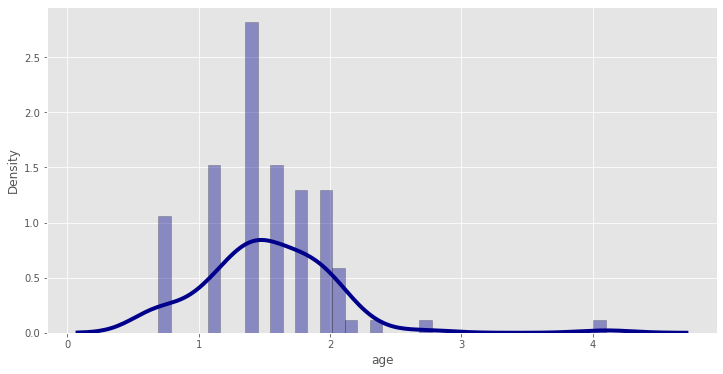

In [40]:
# Density Plot and Histogram of Age..Showcases close to normal distribution.
import seaborn as sns
warnings.simplefilter(action='ignore', category=FutureWarning)
#
plt.figure(figsize=(12,6))
sns.distplot(train['age'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [42]:
X = train.drop(['age', 'case'], axis = 1)
y = train['age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [43]:
lr = linear_model.LinearRegression()

Let's use the fit method to "fit" the model to the dataset. This will ingest the data and "learn" from it

In [44]:
model = lr.fit(X_train, y_train)

In [45]:
# make predictions based on model
predictions = model.predict(X_test)

In [46]:
model.score(X_test, y_test)

-0.5674315470286517

In [47]:
#pick a sampel to manually test it
X_test[:1]

,site,Pop,sex,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
61,5.0,1.0,0.0,91.3,4.077537,90.5,39.0,65.5,41.3,16.0,27.0,32.0


In [48]:
model.predict(X_test[:1])

array([1.53680016])

In [49]:
# To get the actual age we use the inverse of numpy.log1p()
back = np.expm1(1.53680016)
back

3.649688183318686

In [50]:
# Get the data to check the index and price
df = pd.read_csv('possum.csv')
df.iloc[61]

case           62
site            5
Pop         other
sex             f
age           3.0
hdlngth      91.3
skullw       58.0
totlngth     90.5
taill        39.0
footlgth     65.5
earconch     41.3
eye          16.0
chest        27.0
belly        32.0
Name: 61, dtype: object

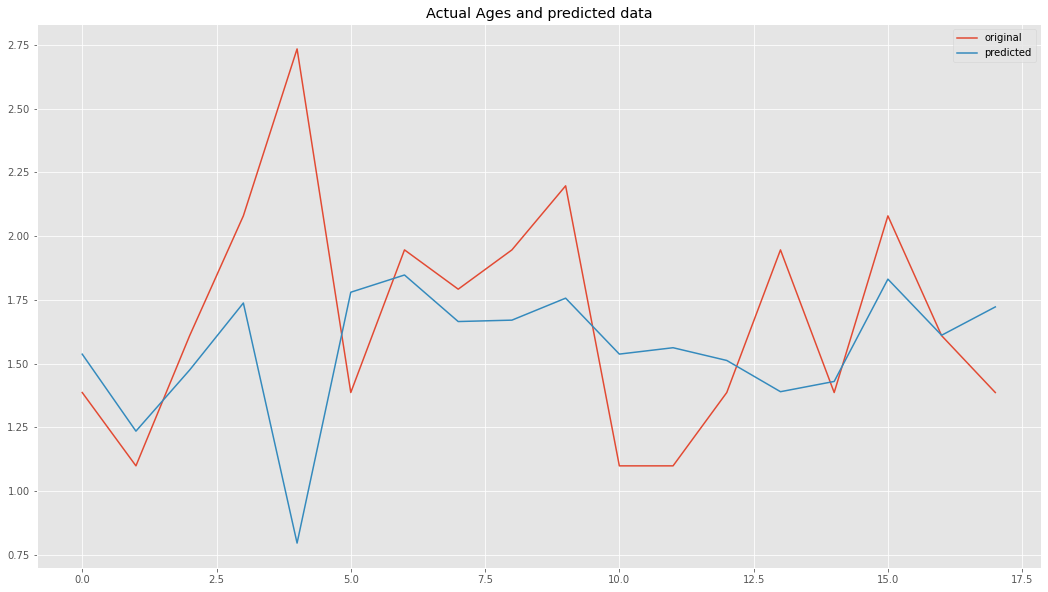

In [51]:
plt.figure(figsize=(18,10))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax,predictions, label="predicted")
plt.title("Actual Ages and predicted data")
plt.legend()
plt.show()